<a href="https://www.kaggle.com/code/cleytoncandeira/digit-recognizer-fundamentals?scriptVersionId=146605867" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Introduction

<div style="text-align:center;">
    <img src="https://www.researchgate.net/profile/Steven-Young-5/publication/306056875/figure/fig1/AS:393921575309346@1470929630835/Example-images-from-the-MNIST-dataset.png" alt="digit">
</div>




Digit Recognizer 🤖📊 is the 'hello world' of data science. Furthermore, due to its practicality, it is excellent for elucidating basic concepts of Machine and Deep Learning. In this notebook, I will delve into what I've gleaned from the integrated courses on Coursera by DeepLearning.AI, specifically, 'TensorFlow Dev.' 🚀📚

## Import data and packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
test = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')
train = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

In [3]:
#Target and features to array
y_train = train['label'].values
X_train = train.drop(columns='label').values
X_test = test.values

## Reshape and Normalization 

- Normalization is a data scaling process. It's evident that values range from 0 to 255 (justified by their grayscale scale), which can be problematic when dealing with deep learning model creation. Thus, reducing their range to [0, 1] is effective for improved performance. In various complex convolutional neural network scenarios, normalization will be necessary, so keep that in mind
- Many activation functions, such as the "relu" function, work best when the input values are in the range 0 to 1. Normalizing the pixels to this range helps avoid saturation problems in the network layers and speeds up training
- Adding the extra dimension (color channel) with size 1 lets the model know that it is working with grayscale images (one color channel). This extra dimension is important for convolution and other operations in convolutional neural networks (CNNs), which are common in image processing tasks.


In [4]:
def reshape_and_normalize(images):
    # Normalize pixel values
    images = images/max(images[0])
    
    # Reshape the images to add an extra dimension
    images = images.reshape(-1, 28, 28, 1)
  
    return images

In [5]:
#Normalize
X_train = reshape_and_normalize(X_train)
X_test = reshape_and_normalize(X_test)

print(f"Maximum pixel value after normalization: {np.max(X_train)}\n")
print(f"Shape of training set after reshaping: {X_train.shape}\n")
print(f"Shape of one image after reshaping: {X_train[0].shape}")

Maximum pixel value after normalization: 1.0

Shape of training set after reshaping: (42000, 28, 28, 1)

Shape of one image after reshaping: (28, 28, 1)


## Callback

A callback is a programming mechanism that allows you to specify what should happen after the completion of a certain  task, without blocking the flow of program execution.

- Callbacks allow you to monitor your model's training progress in real time
- The EarlyStopping callback is used to stop training the model as soon as a stop criterion is reached

In [6]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
            
        if logs.get('accuracy') is not None and logs.get('accuracy') > 0.999:                 
            print("\nReached 99% accuracy so cancelling training!")
            self.model.stop_training = True

## Split train and test set

In [7]:
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size=0.1,
                                                random_state = 2)

## Neural Network

<div style="text-align:center;">
    <img src="https://camo.githubusercontent.com/521578c8e820dc0f662ea03366138a6e0468bf8cb1a4b2286024a0d0b524d54b/68747470733a2f2f6d6c34612e6769746875622e696f2f696d616765732f666967757265732f6d6e6973742d696e7075742e706e67" alt="digit">
</div>





The neural network model used for this challenge is an artificial neural network (ANN) of the sequential type, made up of three main layers: a flattening layer (`Flatten`), a hidden dense layer (`Dense` with ReLU activation), and an output dense layer (`Dense` with Softmax activation). Let's understand each part and how the network works:

1. **Flattening Layer:**
   - This layer is responsible for converting the input, which is a two-dimensional image (28x28 pixels), into a one-dimensional vector of 784 elements. It "flattens" the structure of the image so that it can be processed by the subsequent dense layers.

2. **Hidden Dense Layer (`Dense` with ReLU activation):**
   - This is a fully connected (dense) layer with 128 neural units. Each unit in this layer is connected to each unit in the flattening layer. The ReLU (Rectified Linear Unit) activation function is applied to each output of this layer. The ReLU function is non-linear and introduces non-linearities into the network, allowing it to learn complex representations of the data.
   - The ReLU (Rectified Linear Unit) function is a common activation function in neural networks. It acts as a "switch" that keeps positive values unchanged and turns negative values into zero. Mathematically, the ReLU function is defined as $\mathrm{ReLU}(z) = \max(z, 0)$. This makes it a popular choice due to its non-linearity, allowing neural networks to learn complex representations of data.
   
$$
\mathbf{a} = \mathrm{ReLU}\big((W^{(0)})^{\top}\mathbf{x} + \mathbf{b}\big)
$$

3. **Dense Output Layer (`Dense` with Softmax activation):**
   - This is the final layer of the neural network, and its output is used for multi-class classification. It consists of 10 neural units, each representing a possible class. Softmax activation is applied to these outputs. The Softmax function converts the outputs into a probability distribution, where each value represents the probability of belonging to a specific class. The sum of all probabilities is equal to 1.
   - In the last layer of the neural network, softmax activation is used. In simpler terms, this means that as the network passes through the final layer, it generates a probability distribution for the output class. The probability that input xx belongs to class kk is calculated as:
$$
P\big(y = k \;| \;\mathbf{a}; W^{(1)}\big) = \sigma_k(\mathbf{a}; W^{(1)}) := \frac{\exp\big(\boldsymbol{\theta}^{\top}_k \mathbf{a} \big)}
{\sum_{j=1}^K \exp\big(\boldsymbol{\theta}^{\top}_j \mathbf{a} \big)}.
$$

    Here, $$\boldsymbol{\sigma}:= (\sigma_1,\dots, \sigma_K)^{\top}.$$ represents the probability distribution estimated by the model. Each σkσk is the probability that the input belongs to class kk. This distribution is obtained by considering the output of the hidden layer aa and using the weights $W^{(1)}$.

 - In short, softmax activation is used to transform the network outputs into a probability distribution over the possible classes. This allows the model to assign probabilities to each class, making it easier to interpret and make decisions based on these probabilities. 
    
4. **Model compilation**
   - After defining the network architecture, the model is compiled using the `compile` method. Here are the main settings:
      - `optimizer='adam'`: The Adam optimizer is used to adjust the weights of the network during training. Adam is an adaptive optimizer that automatically adjusts the learning rate.
      - `loss='sparse_categorical_crossentropy'`: The `sparse_categorical_crossentropy` loss function is chosen to calculate the discrepancy between the model's predictions and the actual labels during training. This function is suitable for multi-class classification problems.
      - `metrics=['accuracy']`: During training, accuracy is monitored as a metric to evaluate the model's performance.

Now, with the model compiled, we can proceed to training using appropriate data sets. During training, the weights of the network are iteratively adjusted with the aim of minimizing the loss function, making the model's predictions more accurate. Once trained, the model can be used to make predictions on new data.

In [8]:
def tensor_simple_model(x_train, y_train):
    
    callbacks = myCallback()
    
    model = tf.keras.models.Sequential([
        keras.layers.Flatten(input_shape=(28, 28)),  # Camada de achatamento para converter a imagem em um vetor
        keras.layers.Dense(128, activation='relu'),  # Camada densa com ativação 'relu'
        keras.layers.Dense(10, activation='softmax')  # Camada de saída com ativação 'softmax' para classificação multiclasse
    ])
    
    # Compile the model
    model.compile(optimizer='adam',                   
                  loss='sparse_categorical_crossentropy',                   
                  metrics=['accuracy'])     
    
    # Fit the model for 10 epochs adding the callbacks
    # and save the training history
    history = model.fit(x_train, y_train, epochs=10, callbacks=[callbacks], batch_size=64)
    
    return history, model

In [9]:
history, model = tensor_simple_model(X_train, y_train)

Epoch 1/10
591/591 [==============================] - 6s 3ms/step - loss: 0.3584 - accuracy: 0.8998
Epoch 2/10
591/591 [==============================] - 2s 3ms/step - loss: 0.1651 - accuracy: 0.9528
Epoch 3/10
591/591 [==============================] - 2s 3ms/step - loss: 0.1168 - accuracy: 0.9667
Epoch 4/10
591/591 [==============================] - 2s 3ms/step - loss: 0.0878 - accuracy: 0.9751
Epoch 5/10
591/591 [==============================] - 2s 3ms/step - loss: 0.0696 - accuracy: 0.9798
Epoch 6/10
591/591 [==============================] - 2s 3ms/step - loss: 0.0542 - accuracy: 0.9852
Epoch 7/10
591/591 [==============================] - 2s 3ms/step - loss: 0.0442 - accuracy: 0.9878
Epoch 8/10
591/591 [==============================] - 2s 3ms/step - loss: 0.0359 - accuracy: 0.9897
Epoch 9/10
591/591 [==============================] - 2s 3ms/step - loss: 0.0286 - accuracy: 0.9923
Epoch 10/10
591/591 [==============================] - 2s 4ms/step - loss: 0.0245 - accuracy: 0.9938

## Plot Loss and Accuracy

In [10]:
def plot_loss_and_accuracy(history):
    loss = history.history['loss']
    accuracy = history.history['accuracy']

    plt.figure(figsize=(10, 4))

    # Loss curve
    plt.subplot(1, 2, 1)
    plt.plot(loss, label='Loss')
    plt.title('Loss Curve')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Accuracy curve
    plt.subplot(1, 2, 2)
    plt.plot(accuracy, label='Accuracy')
    plt.title('Accuracy Curve')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

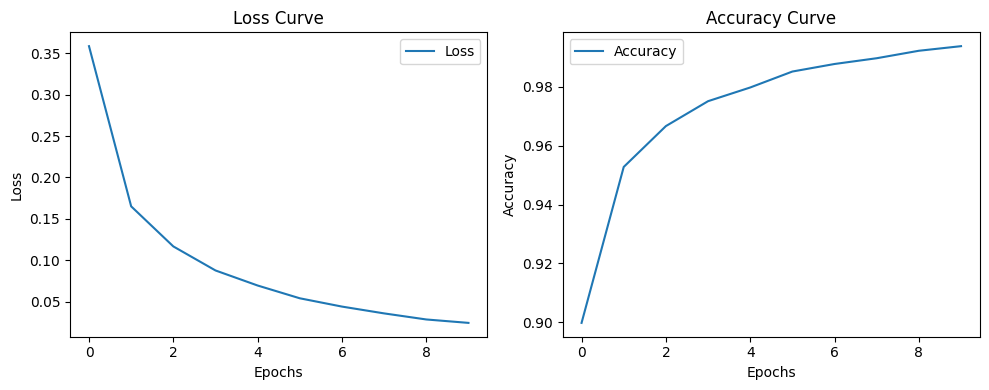

In [11]:
plot_loss_and_accuracy(history)

## Convolutional Neural Networks

- Could we close here and submit? Yes. My place would be around 1029. However, we know that there is more to be done with Convolutional Neural Networks. Convolutional networks, or CNNs, are a type of neural network architecture designed primarily for processing images and data with spatial structure.

- The convolution operation is the cornerstone of CNNs. It involves applying a filter (also called a kernel) to a local region of input data (for example, a part of the image). The convolution operation is defined as:
$$
S(i, j) = (I * K)(i, j) = \sum_m \sum_n I(i - m, j - n) K(m, n)
$$

where, $S(i,j)S(i,j)$ is the resulting value, $I$ is the input, $K$ is the filter and $\sum$ represents the sum over all possible filter positions.

- Pooling layers are used to reduce the dimensionality of the data while retaining the most important features. The pooling operation is often the average or maximum of a group of values in the input. For max pooling, it is defined as:
$$
O(i, j) = \max_{m, n} (I(s \cdot i + m, s \cdot j + n)) 
$$

where $(O(i, j)$ is the output, $I$ is the input, $max$ denotes the maximum, $m$ and $n$ are indices in the pooling dimensions, and $s$ is the step size.


<div style="text-align:center;">
    <img src="https://www.researchgate.net/profile/Woongje-Sung/publication/322160320/figure/fig4/AS:631646000779331@1527607550865/LeNet-59-CNN-for-handwritten-digit-recognition-task.png" alt="digit">
</div>



In [12]:
def convolutional_model():

    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (5,5), activation='relu', input_shape=(28,28,1)),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(64, (5,5), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        #tf.keras.layers.Conv2D(64, (5,5), activation='relu'),
        #tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation = 'relu'),
        tf.keras.layers.Dense(10, activation = 'softmax')
    ])

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [13]:
# Save your untrained model
model = convolutional_model()

# Get number of weights
model_params = model.count_params()

# Unit test to limit the size of the model
assert model_params < 1000000, (
    f'Your model has {model_params:,} params. For successful grading, please keep it ' 
    f'under 1,000,000 by reducing the number of units in your Conv2D and/or Dense layers.'
)

# Instantiate the callback class
callbacks = myCallback()

# Train your model (this can take up to 5 minutes)
history = model.fit(X_train, y_train, epochs=10, callbacks=[callbacks])

Epoch 1/10
1182/1182 [==============================] - 10s 3ms/step - loss: 0.1361 - accuracy: 0.9575
Epoch 2/10
1182/1182 [==============================] - 4s 3ms/step - loss: 0.0442 - accuracy: 0.9864
Epoch 3/10
1182/1182 [==============================] - 4s 3ms/step - loss: 0.0287 - accuracy: 0.9904
Epoch 4/10
1182/1182 [==============================] - 4s 3ms/step - loss: 0.0214 - accuracy: 0.9925
Epoch 5/10
1182/1182 [==============================] - 4s 3ms/step - loss: 0.0173 - accuracy: 0.9946
Epoch 6/10
1182/1182 [==============================] - 5s 4ms/step - loss: 0.0143 - accuracy: 0.9954
Epoch 7/10
1182/1182 [==============================] - 4s 3ms/step - loss: 0.0107 - accuracy: 0.9965
Epoch 8/10
1182/1182 [==============================] - 4s 3ms/step - loss: 0.0103 - accuracy: 0.9963
Epoch 9/10
1182/1182 [==============================] - 4s 3ms/step - loss: 0.0072 - accuracy: 0.9975
Epoch 10/10
1182/1182 [==============================] - 4s 3ms/step - loss: 0.00

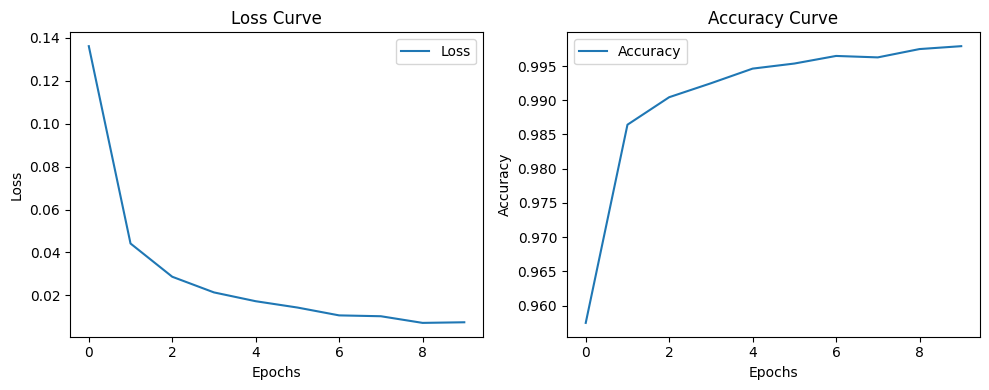

In [14]:
plot_loss_and_accuracy(history)

In [15]:
y_test_pred = model.predict(X_test)

875/875 [==============================] - 1s 2ms/step


In [16]:
y_test_pred_classes = np.argmax(y_test_pred, axis=1)

In [17]:
submission = pd.DataFrame({
    "ImageId": np.arange(1, len(y_test_pred_classes) + 1),
    "Label": y_test_pred_classes
})

submission.to_csv("submission.csv", index=False)